# **Ejercicios**
---
---
# **Cluster the Olivetti Faces Dataset**
---


In [ ]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [ ]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [ ]:
print(olivetti.data[0])

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


Al parecer los datos ya están escalados

Dado que son muy pocos, se empleará StratifiedShuffleSplit para dividir los datos.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(stratified_split.split(olivetti.data, olivetti.target))

In [ ]:
X_train_valid = olivetti.data[train_valid_idx]
X_test = olivetti.data[test_idx]
y_train_valid = olivetti.target[train_valid_idx]
y_test = olivetti.target[test_idx]

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)

train_idx, valid_idx = next(stratified_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [ ]:
print(y_train, y_train.shape)
print(y_valid, y_valid.shape)
print(y_test, y_test.shape)

[23 10 18  6  8 21 26  4 11 35  5 39 23 15  1 11 37 23 14 23 10 16  3 37
 38 10 34 14 34 10  1 32  5  2 33  7  1 27  0 12 14 11 25 27 23 15 39 12
 23 10 34  4 22 21 37  6 33 11  5 39 11  0 10 34 29 29 16 11 31 36 28  1
 19 25  0 31 38 37 20 17 18 26 12 33 29 37  1 19 38 28 12 32 28 19 17 15
 15 29 29 21 26 20 11  4 36 28 23 25 27 28 10 35 34 38  9 26  9 22  8  2
 18 19 22 29 12  6 16 17 13  4  0 17 19 18 30  3  8 35 12 24 25  2 38 17
 20 15 35 30 39 26  7  7 28  6 13 33 15 35 14  0 15 30  7 26 14 31  2  9
 36 25 36 31 21 17  8 28 37 30 30  9 13 13 20 16 20 20  1  9  2 24  5  8
 39  8  1 21 21  7 33  3 24  5 38  6 19 32 36 36 18 22 18 27 21 12 24  4
 16 34 24 14 32  8  7 31  3  2 39  9 39 30 22 30 27 16 32 26 35 13 25 35
 34 13  3  5 33 17 14  0 16  6 31 38 31 24  2 36  6 27  4  0 20 13 32  3
 37  7 32  5 22 33  3 25  4 18 27 19  9 22 24 29] (280,)
[18  7 30 26 22 30 16 32 20 29 12 15 33 31 37 38  1 10 11 24 14 16 25 17
  2 27  1 23 36 22 35  9 10  0  3  9 27 29  0 13 24 32 19  6  3 18 

In [ ]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


Reducción de dimensiones con PCA


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [ ]:
pca.n_components_

200

De 4096 a 200, perfecto!

Hacer clustering con K-Means y escoger el mejor número de clusters.

In [ ]:
from sklearn.cluster import KMeans

k_range = range(5,150,5)
kmeans_per_k = []

for k in k_range:
  print("k={}".format(k))
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
  kmeans_per_k.append(kmeans)

k=5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=25


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=30


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=35


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=45


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=55


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=65


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=70


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=75


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=95


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=100


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=105


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=110


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=115


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=120


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=125


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=130


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=135


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=140


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=145


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

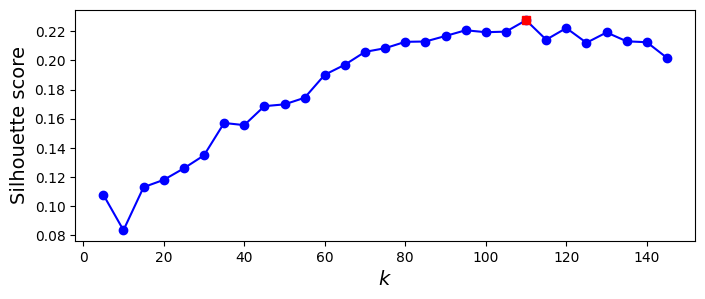

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8,3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [ ]:
best_k

110

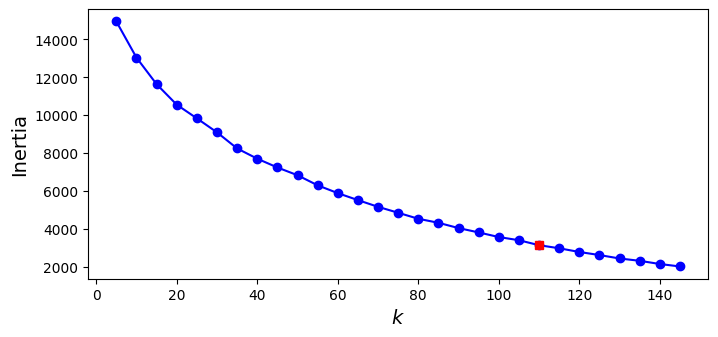

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

El número óptimo de inercia no es claro en este diagrama, dado que no hay ningún 'codo' obvio, así que nos quedaremos con 110.

In [ ]:
best_model = kmeans_per_k[best_index]

Visualizar los clusters

In [ ]:
def plot_faces(faces, labels, n_cols=5):
  faces = faces.reshape(-1, 64,64)
  n_rows = (len(faces) -1)//n_cols + 1
  plt.figure(figsize=(n_cols, n_rows * 1.1))
  for index, (face, label) in enumerate(zip(faces, labels)):
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(face, cmap="gray")
    plt.axis('off')
    plt.title(label)
  plt.show()

for cluster_id in np.unique(best_model.labels_):
  print("Cluster", cluster_id)
  in_cluster = best_model.labels_ == cluster_id
  faces = X_train[in_cluster]
  labels = y_train[in_cluster]
  plot_faces(faces, labels)



Output hidden; open in https://colab.research.google.com to view.

# **Usar clustering como Preprocesamiento para Clasificación**
---
Ejercicio: Continuando con el dataset de Olivetti faces, entrena un clasificador para predecir cuál persona es representada en cada fotografía, y evalualo en el set de validación.
Buscar el número de clusters que permitan al clasificador obtener el mejor rendimiento: ¿Qué rendimiento alcanzaste?
¿Qué pasa si agregas las características de set reducido al set a las características originales (de nuevo, buscando el mejor número de clusters)?


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rnd_clf.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
import numpy as np
print(len(np.unique(y_train)))

40


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_valid_pca)
accuracy_score(y_valid, y_pred)

0.9

In [ ]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)

clf.score(X_valid_reduced, y_valid)

0.7375

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

for n_clusters in k_range:
  pipeline = Pipeline([
        ('kmeans', KMeans(n_clusters=n_clusters, n_init='auto')),
        ('rnd_clf', RandomForestClassifier(n_estimators=150, random_state=42))
  ])
  pipeline.fit(X_train_pca, y_train)
  print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.4375
10 0.475
15 0.525
20 0.625
25 0.675
30 0.6375
35 0.675
40 0.7
45 0.7
50 0.6875
55 0.7125
60 0.725
65 0.75
70 0.7125
75 0.7
80 0.7125
85 0.7375
90 0.7
95 0.7
100 0.7
105 0.75
110 0.725
115 0.7375
120 0.7625
125 0.7375
130 0.75
135 0.775
140 0.7
145 0.7625


AL aprecer, las distancias a los centroides de los clusters no son tan informativas como las imágenes originales.

In [ ]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended =  np.c_[X_test_pca, X_test_reduced]

In [ ]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8

Un poco mejor, pero sigue siendo peor que sin los clusters. Los clusters no son útiles para entrenar directamente a un clasificador en este caso (pero pueden ayudar aún a etiquetar nuevas instancias de entrenamiento).

# **Un Modelo Gaussian Mixture para el dataset Olivetti Faces**
---
Ejercicio: Entrena un modelo de Gaussian mixture en el dataset Olivetti Faces. Para aumentar su velocidad, deberías probar reducir la dimensionalidad del dataset (usando PCA hasta el 99%).

Usar el modelo para generar algunas nuevas caras (con *sample()*) y visualizarlas (Si se empleó PCA, se deberá emplear inverse_transform()).

Trata de modificar algunas imágenes (rotar, voltearlas, oscurecerlas) y ver si el modelo pueede detectar anomalías (es decir, comparar la salida de *score_samples()* para las imágenes normales y las anomalías).



In [ ]:
from sklearn.decomposition import PCA

x_train_pca = PCA(n_components=0.99, random_state=42).fit_transform(X_train)
x_valid_pca = PCA(n_components=0.99, random_state=42).fit_transform(X_valid)
x_test_pca = PCA(n_components=0.99, random_state=42).fit_transform(X_test)


In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [ ]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

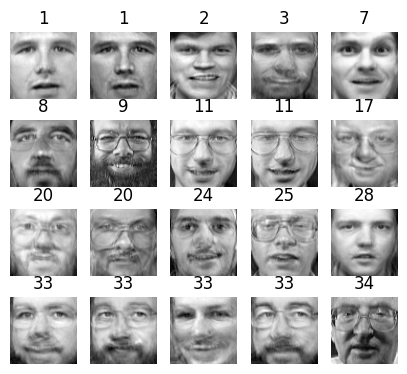

In [ ]:
plot_faces(gen_faces, y_gen_faces)

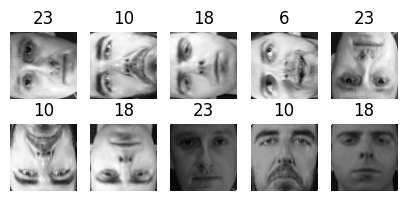

In [ ]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes = [0,2,1])
rotated = rotated.reshape(-1,64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.2
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [ ]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [ ]:
gm.score_samples(X_bad_faces_pca)

array([-5.12919236e+07, -3.15310650e+07, -2.95897662e+07, -4.73996047e+07,
       -2.57863579e+07, -5.03267338e+07, -5.07725347e+07, -1.42944052e+08,
       -1.25259679e+08, -1.25497736e+08])

In [ ]:
gm.score_samples(X_train_pca[:10])

array([1168.94476475, 1118.66466036, 1118.66465841, 1129.35918307,
       1087.53034414, 1146.18455758, 1146.03684124, 1082.49224502,
       1168.65018138, 1129.35918178])

Al comparar nos damos cuenta de que las fotografías ajustadas son altamente desclasificadas por el modelo.

# **Usar Reducción de dimensionalidad para Detección de anomalías**
---
Ejercicio: Algunas técnicas de reducción de dimensionalidad pueden también ser usadas para detección de anomalías. Por ejemplo, toma el dataset de Olivetti faces y redúcelo con PCA, presevando el 99% de la varianza. Luego calcula el error de reconstrucción para cada imagen. Lo siguinete será tomar alguna de las imágenes modificadas en el ejercicio anterior, y mirar su error de reconstrucción: Nota qué tan grande es ese error. Si graficas una imagen reconstruida, verás por qué: trata de recontruir una imagen normal.

In [ ]:
X_train_pca

array([[ 2.20956   ,  8.177852  , -3.160909  , ...,  0.10565921,
         0.11278496, -0.12376846],
       [-2.8795416 , -5.8527193 , -3.11026   , ..., -0.1948187 ,
        -0.07904684,  0.09704933],
       [-3.7210033 , -3.716674  , -1.6135852 , ...,  0.1077451 ,
         0.0685614 ,  0.02084048],
       ...,
       [ 0.02803477, -1.4935057 ,  2.3138206 , ...,  0.12839091,
        -0.06186236,  0.01100474],
       [-2.0366478 , -2.0573668 ,  1.7076194 , ..., -0.11621313,
        -0.04620494,  0.02861484],
       [ 4.334067  ,  0.784225  , -1.6855726 , ...,  0.14180815,
        -0.18896374, -0.02669721]], dtype=float32)

In [ ]:
def reconstruction_errors(pca, X):
  X_pca = pca.transform(X)
  X_reconstructed = pca.inverse_transform(X_pca)
  mse = np.square(X_reconstructed - X).mean(axis=1)
  return mse

In [ ]:
reconstruction_errors(pca, X_train).mean()

0.00018892145

In [ ]:
reconstruction_errors(pca, X_bad_faces).mean()

0.006294357

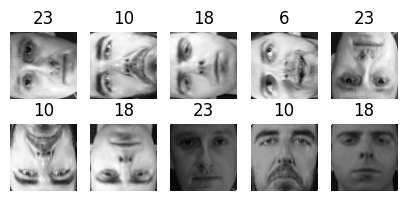

In [ ]:
plot_faces(X_bad_faces, y_bad)

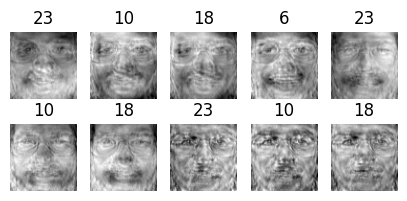

In [ ]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)